In [378]:
import numpy as np
import matplotlib.pyplot as plt
import quandl as qdl
import pandas as pd

from sklearn import preprocessing, model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [64]:
# LOAD DATA

qdl.ApiConfig.api_key = ''
df = qdl.get('WIKI/NFLX', start_date='2017-01-01', end_date='2017-12-31')

LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Quandl account and then include your API key with your requests.

In [ ]:
df.shape

In [379]:
df.to_csv('netflix.csv')

In [380]:
nflx = pd.read_csv('netflix.csv')

In [381]:
nflx.tail()

,Unnamed: 0,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,prediction
215,215,194.46,194.49,190.81,193.90,5839579.0,189.94
216,216,191.61,192.59,189.50,192.02,6609739.0,187.76
217,217,191.12,196.05,191.00,195.08,4598005.0,186.24
218,218,193.64,195.88,193.00,195.71,3408535.0,192.71
219,219,194.54,195.42,191.53,192.12,4162712.0,191.96


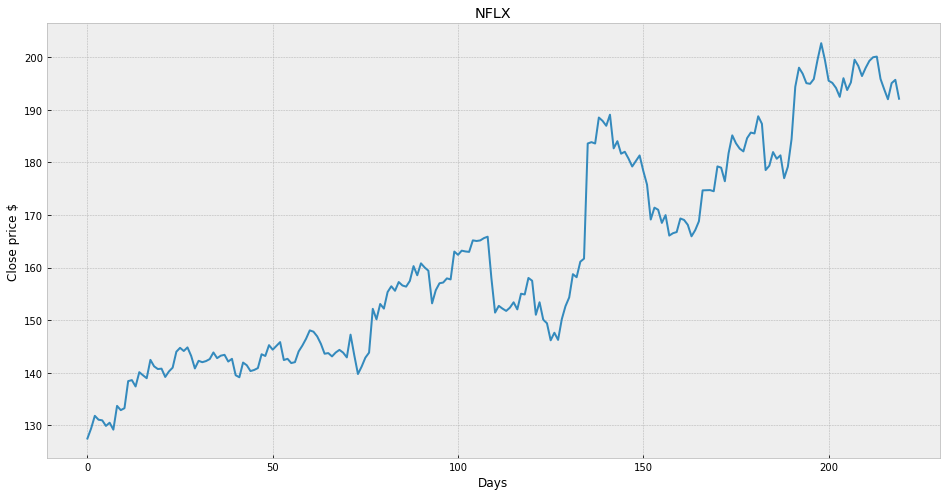

In [382]:
plt.style.use('bmh')
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Close price $')
plt.title('NFLX')
plt.plot(nflx['Adj. Close'])
plt.show()

In [389]:
df = nflx[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [390]:
y = 'Adj. Close'

In [391]:
future = 30
df['prediction'] = df[y].shift(-future)
df.tail()

C:\Users\Eivanas\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,prediction
215,194.46,194.49,190.81,193.90,5839579.0,NaN
216,191.61,192.59,189.50,192.02,6609739.0,NaN
217,191.12,196.05,191.00,195.08,4598005.0,NaN
218,193.64,195.88,193.00,195.71,3408535.0,NaN
219,194.54,195.42,191.53,192.12,4162712.0,NaN


In [392]:
# DEAL WITH NAN
df.dropna(inplace=True)
df.tail()

C:\Users\Eivanas\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,prediction
185,181.01,183.34,180.70,181.97,4963152.0,193.90
186,181.25,181.95,179.36,180.70,4064507.0,192.02
187,180.73,182.90,180.65,181.35,4193999.0,195.08
188,182.11,182.80,176.58,177.01,7316345.0,195.71
189,177.65,179.70,177.55,179.19,3903112.0,192.12


In [393]:
# DESIGN (a.k a features) MATRIX and LABELS VECTOR
X = np.array(df.drop(['prediction', 'Adj. Close'], 1))
y = np.array(df['prediction'])

In [264]:
# SCALE
#X = preprocessing.scale(X)

In [399]:
# TEST

def test_data_size(X, y):
    print(f'X matrix shape:" {X.shape}')
    print(f'y vector size: {y.shape}')
    if (len(X) == len(y)):
        print('we are good to go')
    else:
        print(f'lenght of X: {len(X)} \n')
        print(f'lenght of y: {len(y)}')
test_data_size(X, y)

X matrix shape:" (190, 4)
y vector size: (190,)
we are good to go


In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [268]:
df

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,prediction
0,124.96,128.19,124.31,127.49,9437856.0,142.27
1,127.49,130.17,126.55,129.41,7843559.0,142.01
2,129.22,132.75,128.90,131.81,10185516.0,142.22
3,132.08,133.88,129.81,131.07,10657878.0,142.60
4,131.48,131.99,129.89,130.95,5771835.0,143.86
...,...,...,...,...,...,...
215,194.46,194.49,190.81,193.90,5839579.0,189.94
216,191.61,192.59,189.50,192.02,6609739.0,187.76
217,191.12,196.05,191.00,195.08,4598005.0,186.24
218,193.64,195.88,193.00,195.71,3408535.0,192.71


In [375]:
model = LinearRegression()  #DecisionTreeRegressor()
model.fit(X_train, y_train)

LinearRegression()

In [377]:
# Return R² of the prediction.
accuracy = model.score(X_test, y_test)
accuracy
# Theta coefficients
coef   = model.coef_ 
# Interceptor
inter = model.intercept_
print(f'accuracy: {accuracy}')
print(f'coef: {coef}') 
print(f'intercept: {inter}')

accuracy: 0.6947046442006706
coef: [ 2.14680446e-01  4.21020572e+00 -3.70370170e+00 -1.21753972e-06]
intercept: 46.863689653950274


In [287]:
x_future = df.drop(['Adj. Close','prediction'], 1)[:-future]

x_future = np.array(x_future.tail(future))
#x_future = preprocessing.scale(x_future)
predict = model.predict(x_future)
predict

array([184.45, 194.39, 198.02, 196.87, 195.08, 194.95, 195.86, 181.97,
       202.68, 199.48, 195.86, 192.47, 194.16, 192.47, 196.02, 193.77,
       198.37, 199.54, 198.37, 196.43, 198.  , 174.71, 200.01, 195.86,
       192.47, 183.64, 192.02, 195.08, 195.71, 192.12])

In [288]:
# FORMAT DATA

valid = nflx[X.shape[0]:]
valid['predictions'] = predict
valid

C:\Users\Eivanas\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,predictions
220,2017-11-16,194.33,197.7000,193.7500,195.51,5655042.0,0.0,1.0,194.33,197.7000,193.7500,195.51,5655042.0,184.45
221,2017-11-17,195.74,195.9500,192.6500,193.20,3753775.0,0.0,1.0,195.74,195.9500,192.6500,193.20,3753775.0,194.39
222,2017-11-20,193.30,194.3200,191.9000,194.10,3727412.0,0.0,1.0,193.30,194.3200,191.9000,194.10,3727412.0,198.02
223,2017-11-21,195.04,197.5200,194.9710,196.23,4598017.0,0.0,1.0,195.04,197.5200,194.9710,196.23,4598017.0,196.87
224,2017-11-22,196.58,196.7500,193.6300,196.32,5879771.0,0.0,1.0,196.58,196.7500,193.6300,196.32,5879771.0,195.08
225,2017-11-24,196.65,196.9000,195.3300,195.75,2160300.0,0.0,1.0,196.65,196.9000,195.3300,195.75,2160300.0,194.95
226,2017-11-27,195.56,195.8500,194.0000,195.05,3186677.0,0.0,1.0,195.56,195.8500,194.0000,195.05,3186677.0,195.86
227,2017-11-28,195.34,199.6800,194.0100,199.18,6942358.0,0.0,1.0,195.34,199.6800,194.0100,199.18,6942358.0,181.97
228,2017-11-29,198.91,199.0290,184.3200,188.15,13905339.0,0.0,1.0,198.91,199.0290,184.3200,188.15,13905339.0,202.68
229,2017-11-30,190.31,190.8600,186.6800,187.58,6499326.0,0.0,1.0,190.31,190.8600,186.6800,187.58,6499326.0,199.48


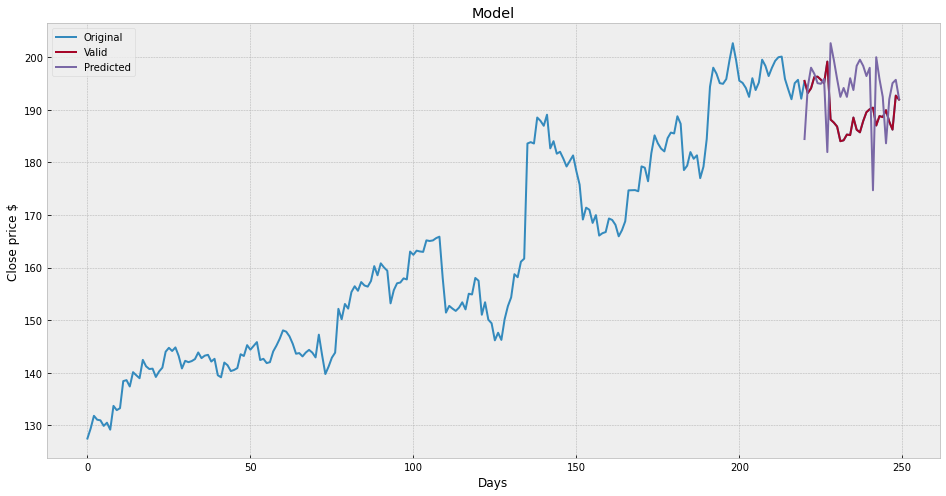

In [334]:
# VISUALIZE

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price $')
plt.plot(nflx['Adj. Close'], c='b')
plt.plot(valid[['Adj. Close', 'predictions']])
plt.legend(['Original', 'Valid', 'Predicted'])
plt.show()

In [293]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [388]:
model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression())
])

model.fit(X, y)
score  = model.score(X_test, y_test)
y_pred = model.predict(x_future)
print(score)

TypeError: Singleton array array('Adj. Close', dtype='<U10') cannot be considered a valid collection.

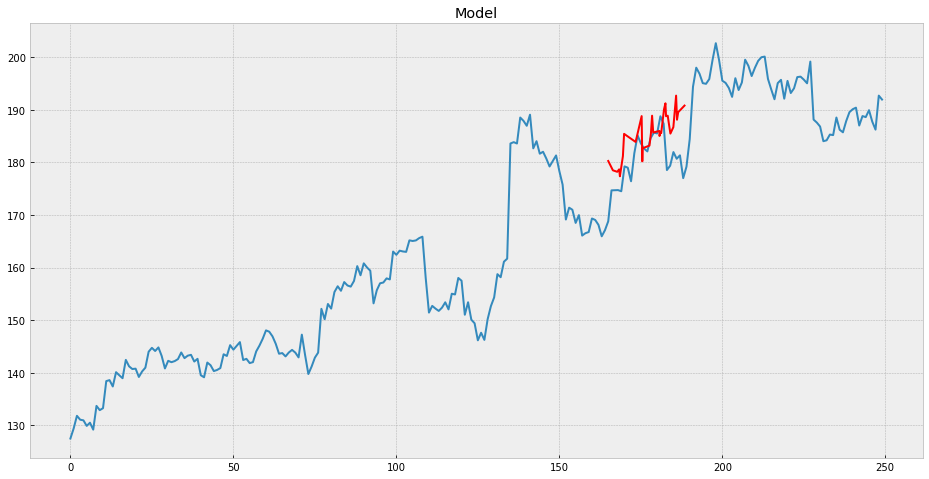

In [336]:
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.plot(nflx['Adj. Close'])

# MEMO NOT: do slice FIX  

plt.plot(sorted(x_future[-future:, 0]), y_pred[np.argsort(x_future[-future:, 0])], 'r')
plt.show()

In [355]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [367]:
def plot_lcs(model, X, Y, val_split=0.25, metrics=mean_squared_error):  
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=val_split) 
    # collections of errors:
    train_time_loss, test_time_loss = [], []   
    # iterating over train size:
    for train_size in range(1, len(x_train)):
        # training
        model.fit(x_train[:train_size], y_train[:train_size])
        
        # train and val predictions
        train_preds = model.predict(x_train[:train_size])
        test_preds = model.predict(x_test)
        
        # metrics calculation
        train_time_loss.append(metrics(y_train[:train_size], train_preds))
        test_time_loss.append(metrics(y_test, test_preds))
        
    # plotting curves
    plt.figure(figsize=(14, 6))
    plt.plot(np.sqrt(train_time_loss), 'r-*', label='Train loss')
    plt.plot(np.sqrt(test_time_loss), 'b-+', label='Test loss')
    plt.legend()
    plt.ylabel(f'{metrics.__name__}')
    plt.xlabel('Training Set Size')

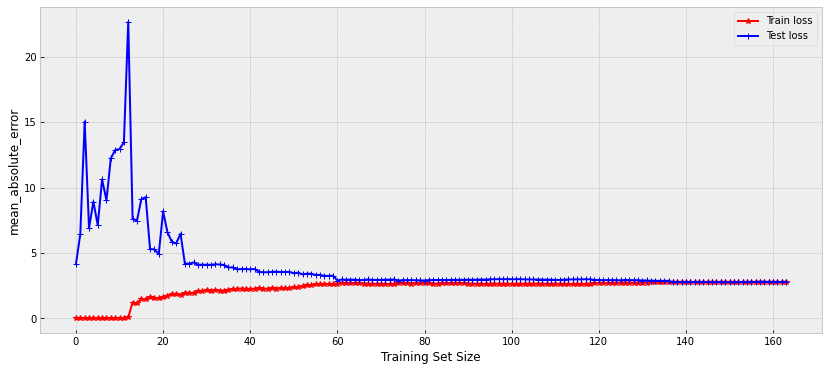

In [368]:
models = {
    'tree': Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('regressor', LinearRegression())
])
#     'lnr' : Pipeline([
#     ('poly_features', PolynomialFeatures()),
#     ('regressor', LinearRegression())
# ]),
#     'sgd' : Pipeline([
#     ('poly_features', PolynomialFeatures()),
#     ('regressor', SGDRegressor())
# ])
}

metrics = mean_absolute_error
for key, model in models.items():
    plot_lcs(model, X, y, metrics=metrics)